# Imports
#### Pandas
Data manipulation and analysis

#### MatPlotLib Pyplot
2D plotting

#### Datetime
Dates and time

#### Numpy
Supports large, multi-dimensional arrays and matrix manipulation and high level mathematical functions on these arrays

#### SQLAlchemy
Database Import

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from sqlalchemy import create_engine

# Import db pw
from keys import pw

### Create the Database Connection

In [2]:
db_uri = 'postgresql://postgres:' + pw + '@localhost:5432/SQLChallenge'
engine = create_engine(db_uri)
connection = engine.connect()

ModuleNotFoundError: No module named 'psycopg2'

# This code will be replaced with accessing the database

In [38]:
# Import Employees, Titles and Salaries csv's
emp_csv = './data/employees.csv'
empDateCols = ['birth_date', 'hire_date']
employees = pd.read_csv(emp_csv, parse_dates=empDateCols)

title_csv = './data/titles.csv'
titleDateCols = ['from_date', 'to_date']
titles = pd.read_csv(title_csv, parse_dates=titleDateCols)

sal_csv = './data/salaries.csv'
salaryDateCols = ['from_date', 'to_date']
salaries = pd.read_csv(sal_csv, parse_dates=salaryDateCols)



#### Create a bar chart of average salary by title

In [124]:
current_salary = salaries.loc[salaries['to_date'].dt.year==9999,:]
current_salary
titles['to_date'].value_counts(ascending=False)
current_title = titles.loc[titles['to_date'] == '9999-01-01',:]
current_title

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
5,10005,Senior Staff,1996-09-12,9999-01-01
...,...,...,...,...
443300,499995,Engineer,1997-06-02,9999-01-01
443302,499996,Senior Engineer,2002-05-13,9999-01-01
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01


In [89]:
print (type(salaries['to_date'].iat[0]))
print(employees.dtypes)
print(titles.dtypes)
print(salaries.dtypes)
titles['to_date'].value_counts()
titles['from_date'].value_counts()
salaries['to_date'].value_counts()
salaries['from_date'].value_counts()
titles['to_date'].value_counts(ascending=True)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
emp_no                 int64
birth_date    datetime64[ns]
first_name            object
last_name             object
gender                object
hire_date     datetime64[ns]
dtype: object
emp_no                int64
title                object
from_date    datetime64[ns]
to_date              object
dtype: object
emp_no                int64
salary                int64
from_date    datetime64[ns]
to_date      datetime64[ns]
dtype: object


1985-06-27         1
1986-09-26         1
1988-08-13         1
1986-07-16         1
1986-11-27         1
               ...  
2001-06-26        79
2000-08-15        81
1997-10-26        88
1998-10-25        91
9999-01-01    240124
Name: to_date, Length: 5888, dtype: int64

In [125]:
emp_title = employees.merge(current_title, on='emp_no')
emp_title

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,Senior Staff,1996-09-12,9999-01-01
...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,Engineer,1997-06-02,9999-01-01
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,Senior Engineer,2002-05-13,9999-01-01
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01


In [126]:
emp_title_salary = emp_title.merge(salaries, on='emp_no')
emp_title_salary

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date_x,to_date_x,salary,from_date_y,to_date_y
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,60117,1986-06-26,1987-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,65828,1996-08-03,1997-08-03
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,40006,1995-12-03,1996-12-02
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,40054,1986-12-01,1987-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,Senior Staff,1996-09-12,9999-01-01,78228,1989-09-12,1990-09-12
...,...,...,...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,Engineer,1997-06-02,9999-01-01,40000,1997-06-02,1998-06-02
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,Senior Engineer,2002-05-13,9999-01-01,58058,1996-05-13,1997-05-13
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01,49597,1987-08-30,1988-08-29
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01,40000,1993-12-27,1994-12-27


In [176]:
statistics_salary_by_title = emp_title_salary.groupby(['title']).aggregate(
    {
        'salary':['mean', 'median', 'min', 'max', 'count']
    }
).sort_values(by=['title'], ascending=True)
statistics_salary_by_title.columns = statistics_salary_by_title.columns.droplevel(0)
statistics_salary_by_title.reset_index()


,title,mean,median,min,max,count
0,Assistant Engineer,48436.856187,44436.5,40000,99683,3588
1,Engineer,48532.428751,44489.0,40000,100683,30983
2,Manager,49600.555556,45169.0,40000,71148,9
3,Senior Engineer,48501.994322,44486.0,40000,110449,85939
4,Senior Staff,58511.960170,56450.0,40000,129492,82024
5,Staff,58448.920003,56387.0,40000,127041,25526
6,Technique Leader,48532.833762,44427.0,40000,104065,12055


In [127]:
avg_salary_by_title = emp_title_salary.groupby(['title']).aggregate(
    {
        'salary':'mean'
    }
).sort_values(by=['salary'], ascending=False)
avg_salary_by_title#.reset_index()

,salary
title,
Senior Staff,58511.960170
Staff,58448.920003
Manager,49600.555556
Technique Leader,48532.833762
Engineer,48532.428751
Senior Engineer,48501.994322
Assistant Engineer,48436.856187


In [128]:
sem_salary_by_title = emp_title_salary.groupby(['title']).aggregate(
    {
        'salary':'sem'
    }
)
sem_salary_by_title.rename(columns = {'salary':'error'}, inplace=True)
sem_salary_by_title

,error
title,
Assistant Engineer,170.178787
Engineer,58.671993
Manager,4207.742157
Senior Engineer,34.983389
Senior Staff,57.601367
Staff,103.146245
Technique Leader,93.750308


In [131]:
max_salary_by_title = emp_title_salary.groupby(['title']).aggregate(
    {
        'salary':'max'
    }
)
max_salary_by_title.rename(columns = {'salary':'max'}, inplace=True)
max_salary_by_title

,max
title,
Assistant Engineer,99683
Engineer,100683
Manager,71148
Senior Engineer,110449
Senior Staff,129492
Staff,127041
Technique Leader,104065


In [134]:
min_salary_by_title = emp_title_salary.groupby(['title']).aggregate(
    {
        'salary':'min'
    }
)
min_salary_by_title.rename(columns = {'salary':'min'}, inplace=True)
min_salary_by_title

,min
title,
Assistant Engineer,40000
Engineer,40000
Manager,40000
Senior Engineer,40000
Senior Staff,40000
Staff,40000
Technique Leader,40000


In [158]:
median_salary_by_title = emp_title_salary.groupby(['title']).aggregate(
    {
        'salary':'median'
    }
)
median_salary_by_title.rename(columns = {'salary':'median'}, inplace=True)
median_salary_by_title

,median
title,
Assistant Engineer,44436.5
Engineer,44489.0
Manager,45169.0
Senior Engineer,44486.0
Senior Staff,56450.0
Staff,56387.0
Technique Leader,44427.0


In [132]:
salary_by_title = avg_salary_by_title.merge(sem_salary_by_title, on='title').sort_values(by=['salary'], ascending=False)
salary_by_title

,salary,error
title,,
Senior Staff,58511.960170,57.601367
Staff,58448.920003,103.146245
Manager,49600.555556,4207.742157
Technique Leader,48532.833762,93.750308
Engineer,48532.428751,58.671993
Senior Engineer,48501.994322,34.983389
Assistant Engineer,48436.856187,170.178787


In [133]:
salary_by_title = salary_by_title.merge(max_salary_by_title, on='title').sort_values(by=['salary'], ascending=False)
salary_by_title

,salary,error,max
title,,,
Senior Staff,58511.960170,57.601367,129492
Staff,58448.920003,103.146245,127041
Manager,49600.555556,4207.742157,71148
Technique Leader,48532.833762,93.750308,104065
Engineer,48532.428751,58.671993,100683
Senior Engineer,48501.994322,34.983389,110449
Assistant Engineer,48436.856187,170.178787,99683


In [135]:
salary_by_title = salary_by_title.merge(min_salary_by_title, on='title').sort_values(by=['salary'], ascending=False)
salary_by_title

,salary,error,max,min
title,,,,
Senior Staff,58511.960170,57.601367,129492,40000
Staff,58448.920003,103.146245,127041,40000
Manager,49600.555556,4207.742157,71148,40000
Technique Leader,48532.833762,93.750308,104065,40000
Engineer,48532.428751,58.671993,100683,40000
Senior Engineer,48501.994322,34.983389,110449,40000
Assistant Engineer,48436.856187,170.178787,99683,40000


In [159]:
salary_by_title = salary_by_title.merge(median_salary_by_title, on='title').sort_values(by=['salary'], ascending=False)
salary_by_title

,salary,error,max,min,median
title,,,,,
Senior Staff,58511.960170,57.601367,129492,40000,56450.0
Staff,58448.920003,103.146245,127041,40000,56387.0
Manager,49600.555556,4207.742157,71148,40000,45169.0
Technique Leader,48532.833762,93.750308,104065,40000,44427.0
Engineer,48532.428751,58.671993,100683,40000,44489.0
Senior Engineer,48501.994322,34.983389,110449,40000,44486.0
Assistant Engineer,48436.856187,170.178787,99683,40000,44436.5


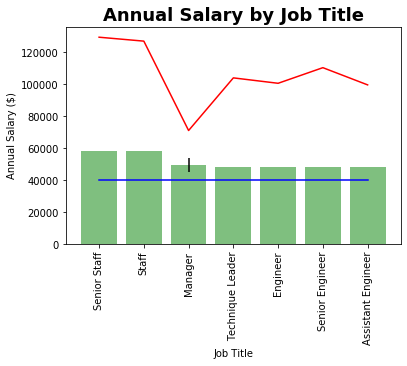

In [161]:
#avg_salary_by_title.plot(kind='bar')
fig, ax = plt.subplots()
plt.bar(salary_by_title.index, salary_by_title['salary'], color='green', alpha=0.5, yerr=salary_by_title['error'])
plt.plot(salary_by_title.index, salary_by_title['max'], color='red')
plt.plot(salary_by_title.index, salary_by_title['min'], color='blue')
plt.xlabel("Job Title")
plt.ylabel("Annual Salary ($)")
plt.title("Annual Salary by Job Title", weight='bold', size=18)
plt.xticks(salary_by_title.index, rotation=90)
plt.show()

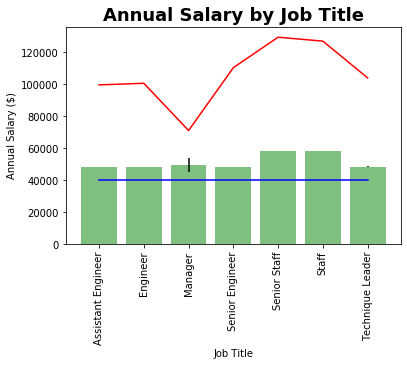

In [177]:
statistics_salary_by_title

#avg_salary_by_title.plot(kind='bar')
fig, ax = plt.subplots()
plt.bar(statistics_salary_by_title.index, statistics_salary_by_title['mean'], color='green', alpha=0.5, yerr=salary_by_title['error'])
plt.plot(statistics_salary_by_title.index, statistics_salary_by_title['max'], color='red')
plt.plot(statistics_salary_by_title.index, statistics_salary_by_title['min'], color='blue')
plt.xlabel("Job Title")
plt.ylabel("Annual Salary ($)")
plt.title("Annual Salary by Job Title", weight='bold', size=18)
plt.xticks(statistics_salary_by_title.index, rotation=90)
plt.show()

In [162]:
# Function comparing populations by Boxplots
def boxPlotCompare(srStaff, staff, mgr, techLdr, eng, srEng, asstEng, title):
    
    # Set the figure size
    fig = plt.figure(figsize=(20,8))
    axBox = fig.add_subplot()
    
    # Show box plots of the data
    box_plot_data=[srStaff, staff, mgr, techLdr, eng, srEng, asstEng]
    plt.boxplot(box_plot_data)
    plt.title(title, color='k', size=24, weight='bold')
    plt.xticks([1, 2, 3, 4, 5, 6, 7], ['Senior Staff', 'Staff', 'Manager', 'Technique Leader', 'Engineer', 'Senior Engineer', 'Assistant Engineer'])
    
    # KEY!  Set the scale to logrithmic
    axBox.set_yscale('linear')
    plt.xlabel("Job Title", size=14, weight='bold')
    plt.ylabel("Salary ($)", size=14, weight='bold')
    plt.show()
       
    return

In [163]:
srStaff = emp_title_salary.loc[(emp_title_salary['title']=='Senior Staff'),'salary']
staff = emp_title_salary.loc[(emp_title_salary['title']=='Staff'),'salary']
mgr = emp_title_salary.loc[(emp_title_salary['title']=='Manager'),'salary']
techLdr = emp_title_salary.loc[(emp_title_salary['title']=='Technique Leader'),'salary']
eng = emp_title_salary.loc[(emp_title_salary['title']=='Engineer'),'salary']
srEng = emp_title_salary.loc[(emp_title_salary['title']=='Senior Engineer'),'salary']
asstEng = emp_title_salary.loc[(emp_title_salary['title']=='Assistant Engineer'),'salary']

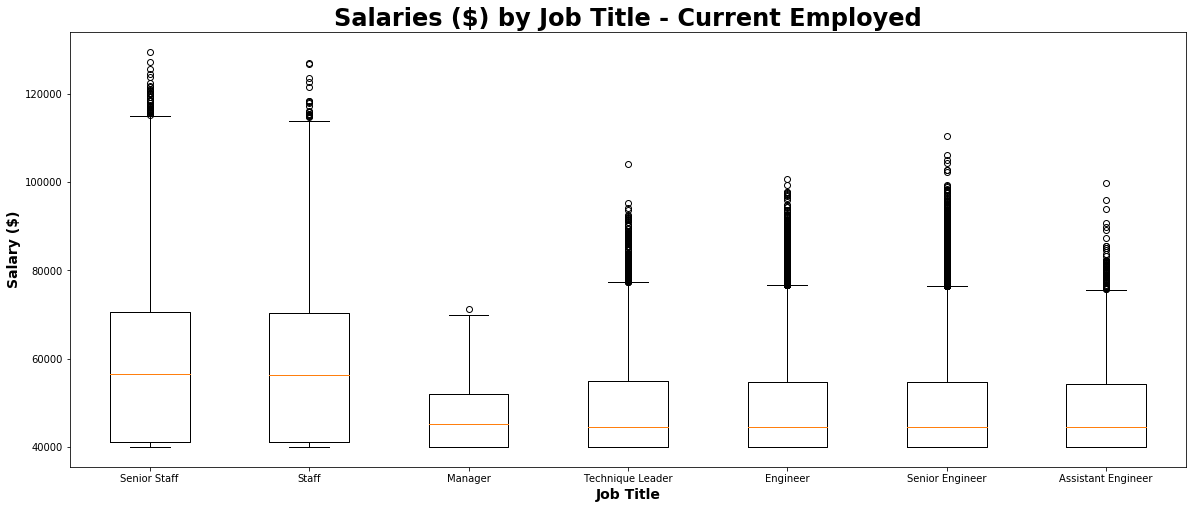

In [164]:
boxPlotCompare(srStaff, staff, mgr, techLdr, eng, srEng, asstEng, "Salaries ($) by Job Title - Current Employed")

In [165]:
# sort data
sorted_emp_title_salary = emp_title_salary.sort_values(['title'], ascending=True)
sorted_emp_title_salary

sorted_salary_by_title = salary_by_title.sort_values(['title'], ascending=True)
sorted_salary_by_title

,salary,error,max,min,median
title,,,,,
Assistant Engineer,48436.856187,170.178787,99683,40000,44436.5
Engineer,48532.428751,58.671993,100683,40000,44489.0
Manager,49600.555556,4207.742157,71148,40000,45169.0
Senior Engineer,48501.994322,34.983389,110449,40000,44486.0
Senior Staff,58511.960170,57.601367,129492,40000,56450.0
Staff,58448.920003,103.146245,127041,40000,56387.0
Technique Leader,48532.833762,93.750308,104065,40000,44427.0


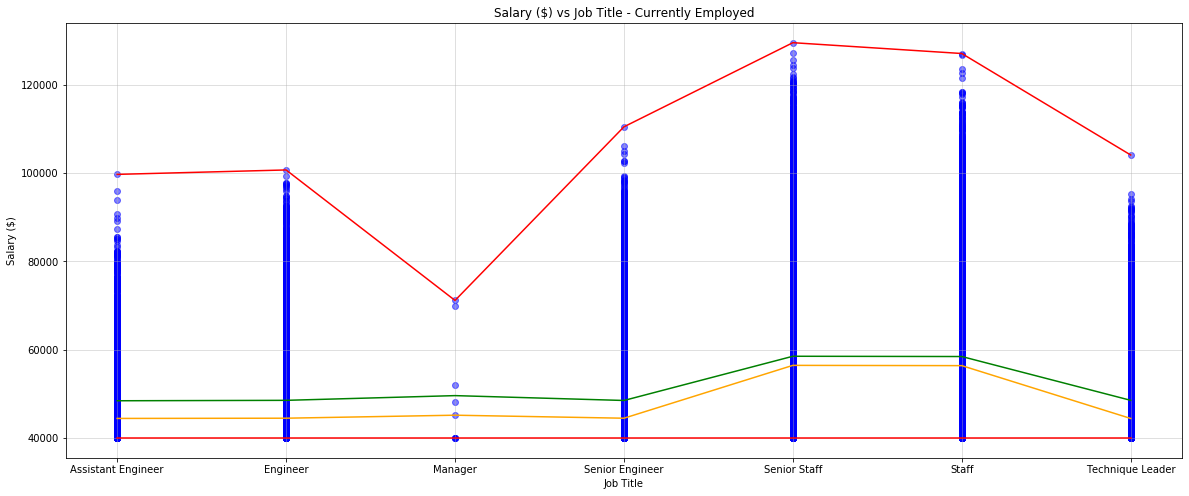

In [166]:
# Plot 
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot()
plt.scatter(sorted_emp_title_salary["title"], sorted_emp_title_salary["salary"], c="b", alpha=0.5)
plt.plot(sorted_salary_by_title.index, sorted_salary_by_title['max'], color='red')
plt.plot(sorted_salary_by_title.index, sorted_salary_by_title['min'], color='red')
plt.plot(sorted_salary_by_title.index, sorted_salary_by_title['salary'], color='green')
plt.plot(sorted_salary_by_title.index, sorted_salary_by_title['median'], color='orange')
plt.title(f'Salary ($) vs Job Title - Currently Employed')
plt.xlabel('Job Title')
plt.ylabel('Salary ($)')
plt.grid(alpha=0.5)


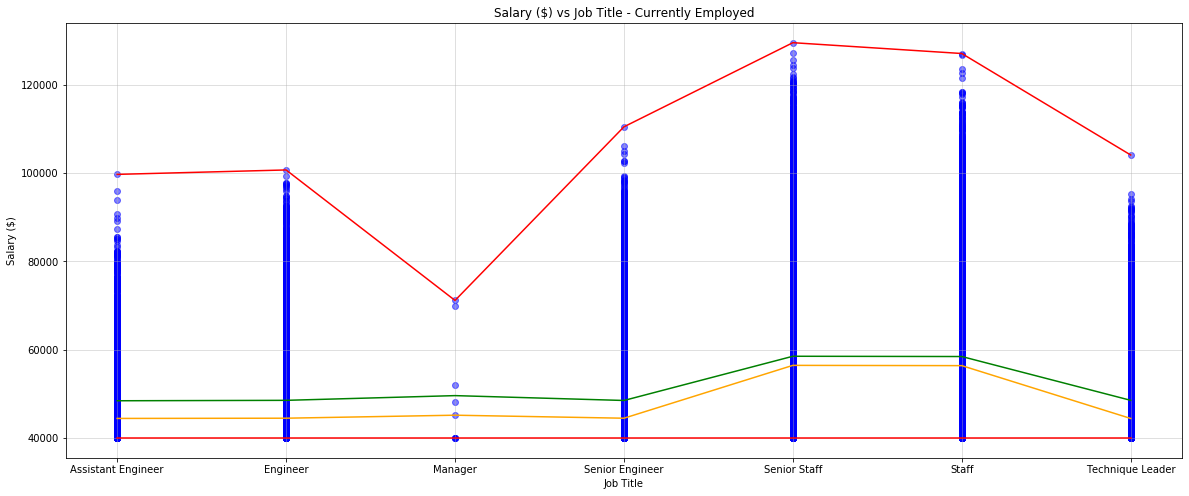

In [178]:
statistics_salary_by_title

# Plot 
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot()
plt.scatter(sorted_emp_title_salary["title"], sorted_emp_title_salary["salary"], c="b", alpha=0.5)
plt.plot(statistics_salary_by_title.index, statistics_salary_by_title['max'], color='red')
plt.plot(statistics_salary_by_title.index, statistics_salary_by_title['min'], color='red')
plt.plot(statistics_salary_by_title.index, statistics_salary_by_title['mean'], color='green')
plt.plot(statistics_salary_by_title.index, statistics_salary_by_title['median'], color='orange')
plt.title(f'Salary ($) vs Job Title - Currently Employed')
plt.xlabel('Job Title')
plt.ylabel('Salary ($)')
plt.grid(alpha=0.5)

In [152]:
count_salary_by_title = emp_title_salary.groupby(['title']).aggregate(
    {
        'salary':'count'
    }
)
count_salary_by_title.rename(columns = {'salary':'count'}, inplace=True)
count_salary_by_title

,count
title,
Assistant Engineer,3588
Engineer,30983
Manager,9
Senior Engineer,85939
Senior Staff,82024
Staff,25526
Technique Leader,12055


#### Look up Employee ID = 499942

In [12]:
my_info = employees.loc[employees["emp_no"] == 499942, :]
my_info

,emp_no,birth_date,first_name,last_name,gender,hire_date
299966,499942,1963-01-10,April,Foolsday,F,1997-02-10
